# Imports and constants

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

from linear_regression import solve_normal_equation

%matplotlib inline

In [2]:
#make all plots in notebooks the same sized
plt.rcParams['figure.figsize'] = (11, 6.5)
#fix random state
rs = 29

# Dataset generation with sklearn

In [3]:
x, y = make_regression(
    n_samples=200,
    n_features=1,
    n_informative=1,
    noise=20,
    random_state=rs)

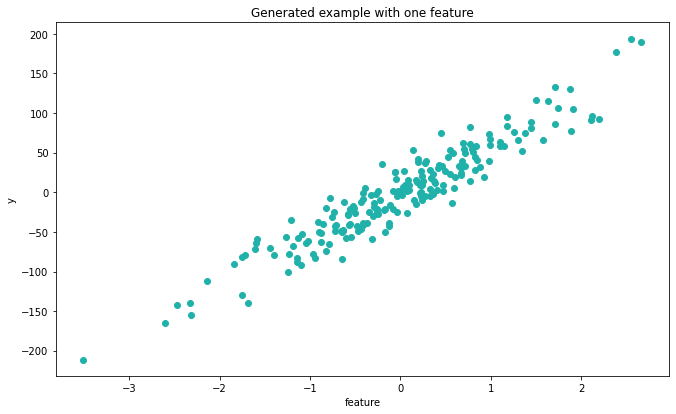

In [75]:
plt.scatter(x, y, c='lightseagreen')
plt.title('Generated example with one feature')
plt.xlabel('feature')
plt.ylabel('y')
plt.show()

# Solutions of linear regression

Linear regression equation:  
$\Large a(x) = w_{0} + \sum_{j=1}^{d} w_{j}x_{j}$  
Here w_0 is bias or intercept, i.e. expected value of *y* if matrix *X* consits of zeroes.  
The simplest form of linear regression is called least squares regression. This strategy produces a regression model, which is a linear combination of the independent variables, that minimizes the sum of squared residuals between the model's predictions and actual values for the dependent variable.  
$\Large MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^2$  


## Solution of linear regression with normal equation

Normal Equation, an analytical approach used for optimization. It is an alternative for Gradient descent. Normal equation performs minimization without iteration. Normal equations are equations obtained by setting equal to zero the partial derivatives of the sum of squared errors; normal equations allow one to estimate the parameters of multiple linear regression.  
$\Large \theta = (X^TX)^{-1}X^TY$  

 - Normal equation works well only with small number of features.

In [5]:
w, y_hat = solve_normal_equation(x, y)

In [6]:
w

array([-1.17560914, 58.74356425])

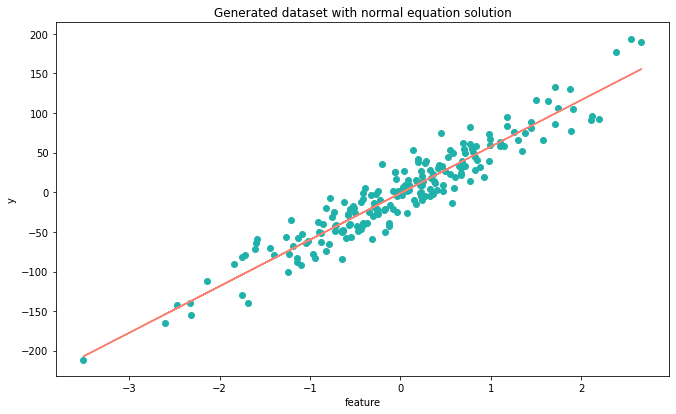

In [7]:
plt.scatter(x, y, c='lightseagreen')
plt.plot(x, y_hat, c='salmon')
plt.title('Generated dataset with normal equation solution')
plt.xlabel('feature')
plt.ylabel('y')
plt.show()

## Solution of linear regression with gradient descent